# Seção 1: Importação das bibliotecas

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
tf.__version__

'2.12.0'

# Seção 2: Importação da base de dados

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep Learning Prático com TensorFlow e Python/databases/fashion-mnist-train.csv", sep=",")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep Learning Prático com TensorFlow e Python/databases/fashion-mnist-test.csv", sep=",")

In [ ]:
train_df.shape

(60000, 785)

In [ ]:
test_df.shape

(10000, 785)

# Seção 3: Visualização dos dados

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
training = np.array(train_df, dtype="float32")
testing = np.array(test_df, dtype="float32")

In [ ]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
training.shape

(60000, 785)

0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

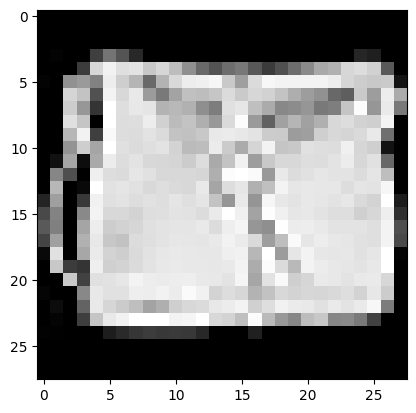

In [ ]:
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28), cmap="gray");

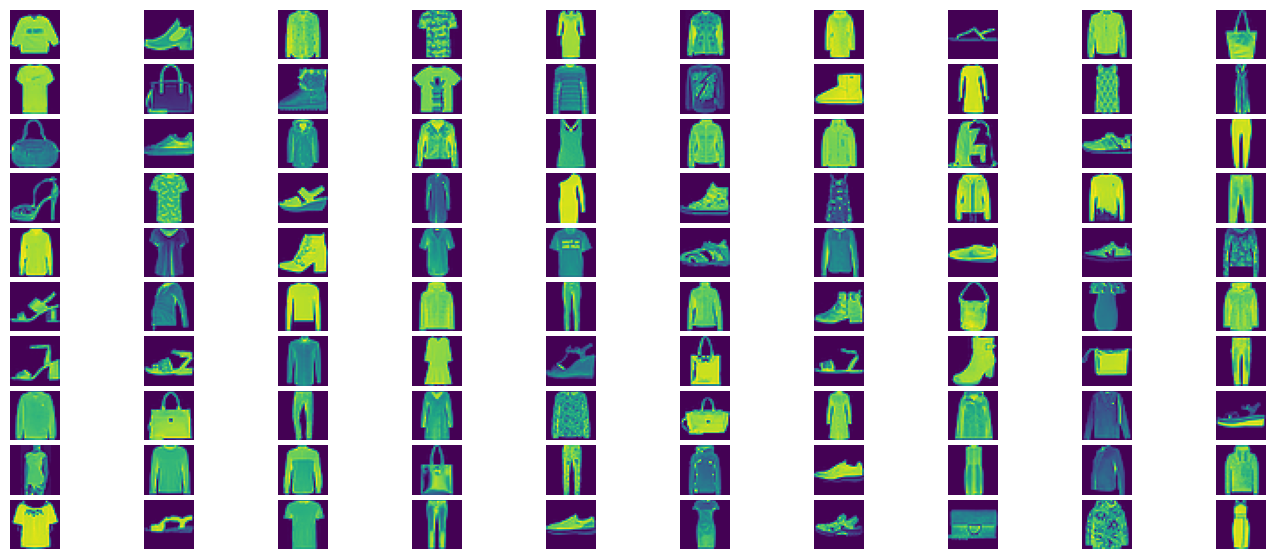

In [ ]:
w_grid = 10
h_grid = 10
fig, axes = plt.subplots(w_grid, h_grid, figsize=(17,7))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, w_grid * h_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training[i, 1:].reshape(28,28))
  axes[i].axis("off")

plt.subplots_adjust(hspace=0.1)

# Seção 4: Tratamento da base de dados

In [ ]:
x_train = training[:, 1:] / 255
y_train = training[:, :1]

In [ ]:
x_train.shape, y_train.shape

((60000, 784), (60000, 1))

In [ ]:
x_test = testing[:, 1:] / 255
y_test = testing[:, :1]

In [ ]:
x_test.shape, y_test.shape

((10000, 784), (10000, 1))

In [ ]:
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Seção 5: Construção e Treinamento do Modelo

In [ ]:
from tensorflow.keras import layers, models
cnn = models.Sequential()

# Convolutional, 32 Filters, (3, 3) Filter size, relu: value <= 0 return 0 else return value
cnn.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
cnn.add(layers.MaxPooling2D(2, 2))

# Convolutional, 64 Filters, (3, 3) Filter size, relu: value <= 0 return 0 else return value
cnn.add(layers.Conv2D(64, (3, 3), activation="relu"))
cnn.add(layers.MaxPooling2D(2, 2))

# Convolutional, 64 Filters, (3, 3) Filter size, relu: value <= 0 return 0 else return value
cnn.add(layers.Conv2D(64, (3, 3), activation="relu"))

# Flattening
cnn.add(layers.Flatten())

# Dense
cnn.add(layers.Dense(64, activation="relu"))
cnn.add(layers.Dense(10, activation="softmax"))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
epochs = 100
history = cnn.fit(x_train, y_train, batch_size=512, epochs=epochs)

Epoch 1/100
118/118 [==============================] - 21s 36ms/step - loss: 1.7600 - accuracy: 0.2591
Epoch 2/100
118/118 [==============================] - 4s 34ms/step - loss: 0.9299 - accuracy: 0.5990
Epoch 3/100
118/118 [==============================] - 4s 31ms/step - loss: 0.6364 - accuracy: 0.7447
Epoch 4/100
118/118 [==============================] - 4s 31ms/step - loss: 0.4996 - accuracy: 0.8047
Epoch 5/100
118/118 [==============================] - 4s 31ms/step - loss: 0.4312 - accuracy: 0.8366
Epoch 6/100
118/118 [==============================] - 4s 32ms/step - loss: 0.3830 - accuracy: 0.8602
Epoch 7/100
118/118 [==============================] - 4s 31ms/step - loss: 0.3393 - accuracy: 0.8788
Epoch 8/100
118/118 [==============================] - 4s 31ms/step - loss: 0.3143 - accuracy: 0.8868
Epoch 9/100
118/118 [==============================] - 4s 31ms/step - loss: 0.2795 - accuracy: 0.8997
Epoch 10/100
118/118 [==============================] - 4s 32ms/step - loss: 0.26

# Seção 6: Avaliação do Modelo

In [ ]:
evaluation = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5096 - accuracy: 0.9166


In [ ]:
evaluation

[0.509601891040802, 0.9165999889373779]

In [ ]:
# Fazer previsões
predicted_probabilities = cnn.predict(x_test)

# Obter classes previstas com base nas probabilidades
predicted_classes = np.argmax(predicted_probabilities, axis=1)

313/313 [==============================] - 1s 3ms/step


In [ ]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [ ]:
y_test

array([[0.],
       [1.],
       [2.],
       ...,
       [8.],
       [8.],
       [1.]], dtype=float32)

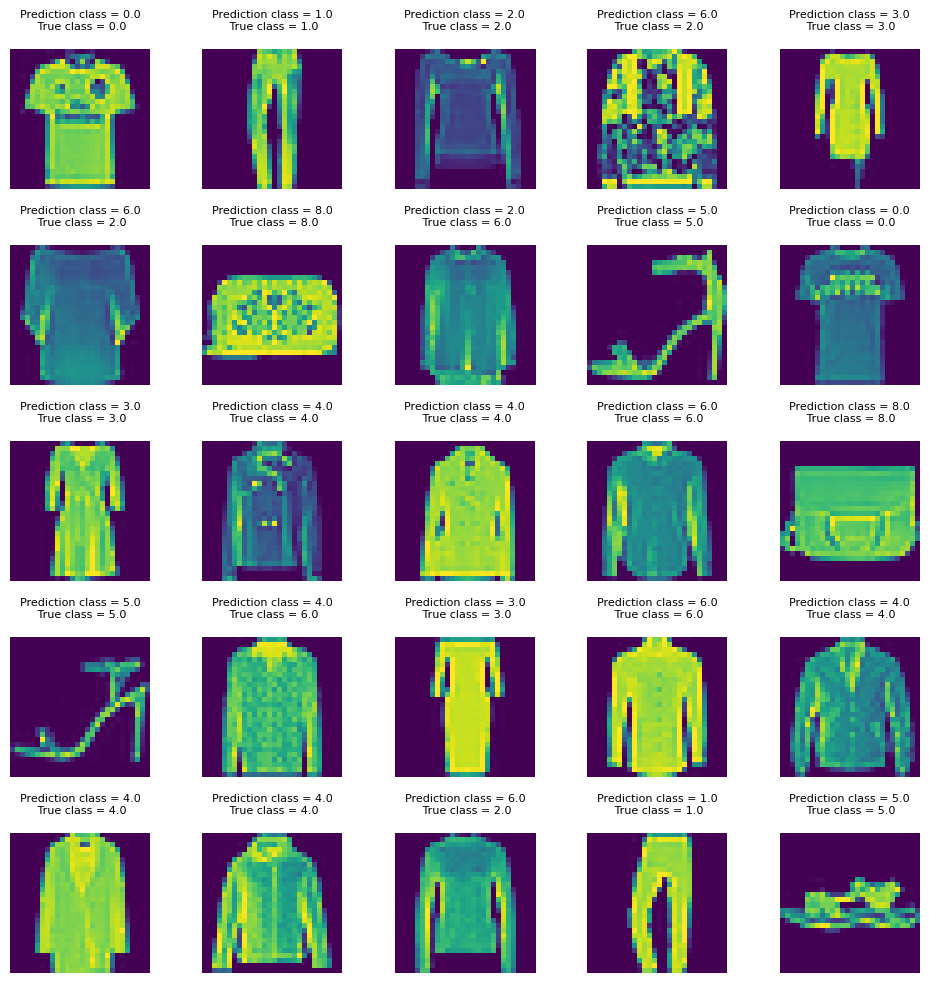

In [ ]:
w_grid = 5
h_grid = 5
fig, axes = plt.subplots(w_grid, h_grid, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, w_grid * h_grid):
  axes[i].imshow(x_test[i].reshape(28,28))
  axes[i].set_title(f"Prediction class = {predicted_classes[i]:.1f}\n True class = {y_test[i][0]}\n", fontsize="8")
  axes[i].axis("off")

plt.subplots_adjust(hspace=0.4)

<Axes: >

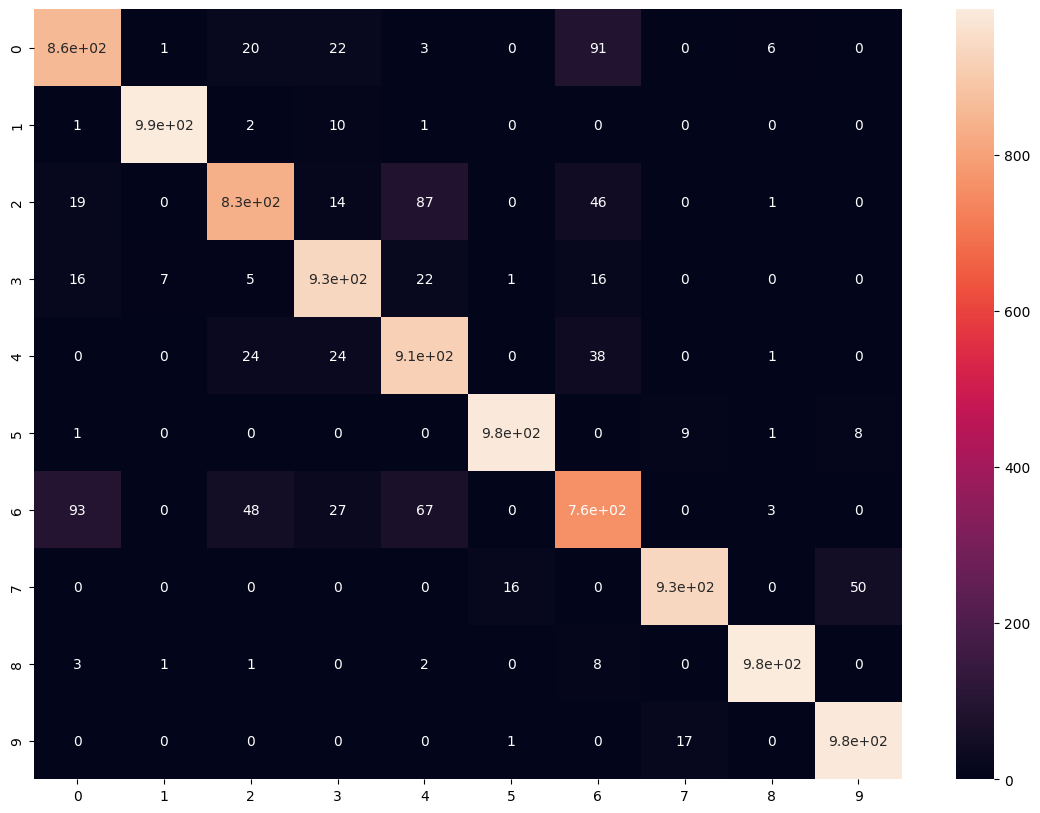

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)

In [ ]:
cm

array([[857,   1,  20,  22,   3,   0,  91,   0,   6,   0],
       [  1, 986,   2,  10,   1,   0,   0,   0,   0,   0],
       [ 19,   0, 833,  14,  87,   0,  46,   0,   1,   0],
       [ 16,   7,   5, 933,  22,   1,  16,   0,   0,   0],
       [  0,   0,  24,  24, 913,   0,  38,   0,   1,   0],
       [  1,   0,   0,   0,   0, 981,   0,   9,   1,   8],
       [ 93,   0,  48,  27,  67,   0, 762,   0,   3,   0],
       [  0,   0,   0,   0,   0,  16,   0, 934,   0,  50],
       [  3,   1,   1,   0,   2,   0,   8,   0, 985,   0],
       [  0,   0,   0,   0,   0,   1,   0,  17,   0, 982]])

In [ ]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = [f"Classe {i}" for i in range(num_classes)]
target_names

['Classe 0',
 'Classe 1',
 'Classe 2',
 'Classe 3',
 'Classe 4',
 'Classe 5',
 'Classe 6',
 'Classe 7',
 'Classe 8',
 'Classe 9']

In [ ]:
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

    Classe 0       0.87      0.86      0.86      1000
    Classe 1       0.99      0.99      0.99      1000
    Classe 2       0.89      0.83      0.86      1000
    Classe 3       0.91      0.93      0.92      1000
    Classe 4       0.83      0.91      0.87      1000
    Classe 5       0.98      0.98      0.98      1000
    Classe 6       0.79      0.76      0.78      1000
    Classe 7       0.97      0.93      0.95      1000
    Classe 8       0.99      0.98      0.99      1000
    Classe 9       0.94      0.98      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

